# 线性回归（一）

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<span style="color:purple">1) 使用pandas库的read_csv()函数(可以参考[pandas的官方文档](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html))将训练数据集'train.csv'载入到Dataframe对象中。</span>

In [2]:
# Your code here
train_frame = pd.read_csv('train.csv')
test_frame = pd.read_csv('test.csv')
train = np.array(train_frame)
test = np.array(test_frame)

train_frame


,x,y
0,0.360705,5.555215
1,1.544153,9.890948
2,2.767041,13.911097
3,0.816535,7.835054
4,0.272320,5.924909
...,...,...
155,1.815708,10.233754
156,0.759685,8.002576
157,0.360873,5.799197
158,1.501412,10.246296


<span style="color:purple">2) 假设模型为一元线性回归模型$\hat{y}=wx+b$, 损失函数为$l(w,b)=\frac{1}{2}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})^2$, 其中$\hat{y}^{(i)}$表示第$i$个样本的预测值，$y^{(i)}$表示第$i$个样本的实际标签值, $m$为训练集中样本的个数。求出使得损失函数最小化的参数$w$和$b$。</span>

方法① 

将$l(w,b)$对$w$和$b$求导，得到
$$
\frac{\partial l(w,b)}{\partial w}=w\sum_{i=1}^m x_i^2 -\sum_{i=1}^m (y_i-b)x_i,
$$
$$
\frac{\partial l(w,b)}{\partial b}=mb -\sum_{i=1}^m (y_i-wx_i),
$$
令上述两式为零即可得到$w$和$b$的解析解：
$$
w=\frac{\sum_{i=1}^m y_i (x_i-\bar{x})}{\sum_{i=1}^m x_i^2-\frac{1}{m}(\sum_{i=1}^m x_i)^2},
$$
$$
b=\frac{1}{m}\sum_{i=1}^m(y_i-wx_i),
$$
其中$\bar{x}=\frac{1}{m}\sum_{i=1}^m x_i$为$x$的均值。



In [3]:
# Your code here
m=160
x_bar=np.sum(train[:, 0])/m
x=train[:, 0:1]#切片第一列
y=train[:, 1:2]#切片第二列
w=(x-x_bar).T.dot(y)/(np.sum(x*x)-np.sum(train[:, 0])*np.sum(train[:, 0])/m)#分子为矩阵相乘，故用.dot, 分子为数组相乘，所以要sum
b=np.sum(y-w*x)/m
print(w, b)


[[3.04147887]] 4.906073659228104


方法② 梯度下降法。(暂时不用实现)

方法③ 

用矩阵表示，假设数据集有$m$个样本，特征有$n$维$。X=\left[ \begin{matrix} x_{11} & x_{12} & \cdots & x_{1n} & 1 \\
                         x_{21} & x_{22} & \cdots & x_{2n} & 1 \\
                         \vdots & \vdots &      & \vdots & \vdots \\
                         x_{m1} & x_{m2} & \cdots & x_{mn} & 1 \end{matrix} \right]$,
        实际标签$Y=\left[ \begin{matrix} y_{1} \\
                         y_{2} \\
                         \vdots \\
                         y_{m}\end{matrix} \right]$,
        参数$B=\left[ \begin{matrix} w_{1} \\
                         w_{2} \\
                         \vdots \\
                         w_{n} \\
                         b\end{matrix} \right]$，则解析解为$B^*=(X^T X)^{-1}X^T Y$。推导过程可参考[这篇文章](https://zhuanlan.zhihu.com/p/74157986)。

In [4]:
# Your code here
X=train[:, 0:1]
X=np.c_[X,np.ones((160, 1))]
Y=train[:, 1:2]
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)



array([[3.04147887],
       [4.90607366]])

<span style="color:purple">3) 使用求解出来的线性回归模型对测试数据集'test.csv'进行预测，输出可视化结果（比如用seaborn或者matplotlib等可视化库来画出测试数据的散点图以及训练好的模型函数图像）。</span>

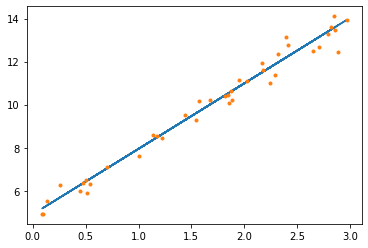

In [5]:
# Your code here
pred = w[0, 0] * test[:, 0] + b
plt.plot(test[:, 0], pred)
plt.plot(test[:, 0], test[:, 1], '.')
plt.show()




<span style="color:purple">4) 在训练数据集'train2.csv'上求一个三元线性回归模型$\hat{y}=w_1 x_1 + w_2 x_2 + w_3 x_3 + b$的使得损失函数$l(w_1,w_2,w_3,b)=\frac{1}{2}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})^2$最小的参数$w_1,w_2,w_3$以及$b$。并在测试数据集'test2.csv'上进行预测，输出预测结果的均方误差$MSE(\hat{y},y)=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$, $n$为测试集中样本个数。</span>

方法① 同2)中的方法③。

In [6]:
# Your code here
train_frame2 = pd.read_csv('train2.csv')
test_frame2 = pd.read_csv('test2.csv')
train2 = np.array(train_frame2)
test2 = np.array(test_frame2)
X=train2[:, 0:3]
X=np.c_[X,np.ones((160, 1))]
Y=train2[:, 3:4]
w=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)



x_pred = test2[:,0:3]
x_pred = np.c_[x_pred, np.ones((40, 1))]
y_pred = x_pred.dot(w)
np.sum((y_pred-test2[:, 3:4])*(y_pred-test2[:, 3:4]))/40



0.16537691128951923

方法② 梯度下降法。(暂时不用实现)

方法② 梯度下降法。
手动实现梯度下降法(不使用机器学习框架，如PyTorch、TensorFlow等)来进行模型的训练。
算法步骤如下：1.初始化模型参数$w$和$b$的值；
2.在负梯度的方向上更新参数(批量梯度下降、小批量随机梯度下降或者随机梯度下降均可)，并不断迭代这一步骤，
更新公式(以小批量随机梯度下降为例)可以写成：$$w\gets w-\frac{\eta}{\left|B\right|}\sum_{i\in{B}}x^{(i)}(wx^{(i)}+b-y^{(i)}),$$ 和$$b\gets b-\frac{\eta}{\left|B\right|}\sum_{i\in{B}}(wx^{(i)}+b-y^{(i)}),$$ 其中$\eta$表示学习率,$B$表示每次迭代中随机抽样的小批量，$\left|B\right|$则表示$B$中的样本数量。
3. 终止条件为迭代次数达到某一上限或者参数更新的幅度小于某个阈值。



In [7]:
# Your code here
#读取数据集
data = pd.read_csv('train.csv')
test_frame = pd.read_csv('test.csv')
test=np.array(test_frame)
#data2= pd.read_csv('train2.csv')


In [8]:
#1，初始化
data.insert(0, 'Ones', 1)#(loc,column,value)即在第一列中插入1
cols=data.shape[1]#读取矩阵列数， =shape[-1]
X=data.iloc[:, 0:cols-1]# iloc根据位置索引选取数据，先行后列,取前cols-1列作为输入向量,下标从0开始
y=data.iloc[: ,cols-1:cols]
#print(X.head)
#print(y.head)
X=np.matrix(X.values)   #注意matrix与array的区别，多元用array
y=np.matrix(y.values)
theta=np.matrix([0,0])    #初始化theta
print(X.shape, theta.shape, y.shape)
print(y[1])

(160, 2) (1, 2) (160, 1)
[[9.89094799]]


In [9]:
#2，def function
#注意：此处实现为matrix，多维的话注意改成array
#损失函数
def computeCost(X, y, theta):
    inner =np.power(((X* theta.T)-y),2) #数组为对应元素运算，返回损失函数， len（x）为行数
    return np.sum(inner)/(2*len(X))
#批量梯度下降
def gradientDescent(X,y, theta, alpha, epoch):  #epoch为训练次数
    temp=np.matrix(np.zeros(theta.shape))#初始化一个临时矩阵
    #parameters=int(theta.flatten().shape[1])#参数theta的数量
     # flatten()即返回一个折叠成一维的数组。但是该函数只能适用于numpy对象，即array或者mat，普通的list列表是不行的
    cost=np.zeros(epoch)#初始化一个ndarray，包含每次训练后的cost
    #np.zeros 生成一个一维0矩阵
    counterTheta=np.zeros((epoch,2)) #对应每次cost的theta
    m=X.shape[0]#x的行数
    for i in range(epoch):
        temp = theta-(alpha/m)*(X*theta.T-y).T*X
        theta=temp
        counterTheta[i]=theta
        cost[i]=computeCost(X,y, theta)#计算损失函数值
    pass #空语句，占位，避免报错
    return counterTheta, theta, cost
#随机批量下降
def StochastiGD(X, y, theta ,alpha, epoch):
    temp=np.matrix(np.zeros(theta.shape))
    cost=np.zeros(epoch)
    counterTheta=np.zeros((epoch,2))
    m=X.shape[0]
    for i in range(epoch):
        for j in range(m):
            temp=theta-alpha*(X[j]*theta.T-y[j]).T*X[j]
            theta=temp;
            counterTheta[i]=theta
            cost[i]=computeCost(X,y, theta)#计算损失函数值
            pass
        pass
    return counterTheta, theta, cost

In [10]:
#3,Run model
alpha =0.01
epoch=3800
counterTheta, final_theta, cost=gradientDescent(X, y, theta, alpha, epoch)
#对应每次的theta, 最后的theta，和每次的cost
#computeCost(X, y, final_theta)#计算最后的cost
counterTheta2,final_theta2, cost2=StochastiGD(X, y, theta ,alpha, epoch)


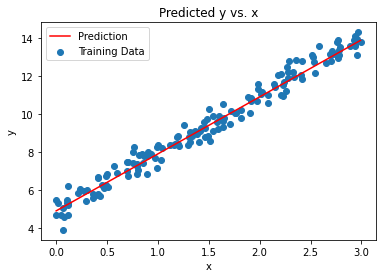

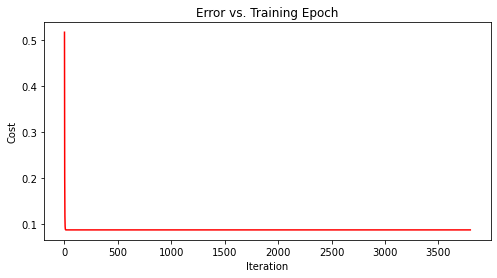

In [12]:
#4, plot
x=np.linspace(data.x.min(), data.x.max()) #切割数据
f=final_theta2[0,0]+(final_theta2[0,1]*x) #预测函数
fig1, ax = plt.subplots(figsize=(6, 4)) #图像1
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.x, data.y, label='Training Data')
ax.legend(loc=2)#legend为图例
ax.set_xlabel('x')#设置x轴
ax.set_ylabel('y')
ax.set_title('Predicted y vs. x')
#画出损失值与迭代次数的图像，通用！
fig2, ax = plt.subplots(figsize=(8, 4))
ax.plot(np.arange(epoch), cost2, 'r') #arange() 主要是用于生成数组,括号内只有一个值代表终止值
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()